In [142]:
from datascience import *
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as plt
%matplotlib inline

import csv
import zipfile
from pathlib import Path
import re

In [146]:
sampled = pd.read_csv('cp113.csv')
data = Table().from_df(sampled, keep_index=False).drop(0)
pd_data = data.to_df()
pd_data = pd_data.drop(columns=['classwkr', 'classwkrd', 'empstatd', 'inctot'])

In [148]:
def replace_column(lst, data, column, new_value):
    return data[column].replace(lst, new_value, inplace=True)

In [149]:
rangeLst = [np.arange(170, 490+1), np.arange(570, 960+1), np.arange(770, 771), 
           np.arange(1070, 3990+1), np.arange(4070, 4590+1), np.arange(4670, 5790+1), 
           np.arange(6070, 6390+1), np.arange(6470, 6780+1), np.arange(6870, 6990+1), 
           np.arange(7070, 7190+1), np.arange(7270, 7570+1), np.arange(7580, 7790+1),
           np.arange(7860, 7890+1), np.arange(7970, 8470+1), np.arange(8560, 8590+1), 
           np.arange(8660, 8690+1), np.arange(8770, 9290+1), np.arange(9370, 9590+1), 
           np.arange(9670, 9870+1)]
occLst = [np.arange(10, 430+1), np.arange(500, 741), np.arange(800, 950+1), 
         np.arange(1000, 1240+1), np.arange(1300, 1560+1), np.arange(1600, 1965+1),
         np.arange(2000, 2060+1), np.arange(2100, 2160+1), np.arange(2200, 2550+1), 
         np.arange(2600, 2921), np.arange(3000, 3541), np.arange(3600,3656),
         np.arange(3700,3955+1), np.arange(4000, 4151), np.arange(4200,4251), 
         np.arange(4300,4651), np.arange(4700,4966), np.arange(5000, 5941), 
         np.arange(6000, 6131), np.arange(6200, 6941), np.arange(7000, 7631), 
         np.arange(7700, 8966), np.arange(9000,9751), np.arange(9800, 9831)]
povertyLst = [np.arange(0, 101), np.arange(100, 201), np.arange(200, 601)]

In [150]:
data_copy = pd_data.copy()

In [151]:
j=0
for i in rangeLst:
    replace_column(i, data_copy, 'ind', j)
    j +=1
k=0
for i in occLst:
    replace_column(i, data_copy, 'occ', k)
    k+=1
m=0
for i in povertyLst:
    replace_column(i, data_copy, 'poverty', m)
    m +=1

In [170]:
occupation_dict = {
    0: 'Management, Business, Science, and Arts Occupations',
    1: 'Business Operations',
    2: 'Financial Specialists', 
    3: 'Computer Operations',
    4: 'Architecture & Engineering',
    5: 'Life & Social Sciences',
    6: 'Community & Social Services',
    7: 'Legal Occupations' ,
    8: 'Education & Training',
    9: 'Arts, Design & Entertainment',
    10: 'Healthcare Practitioners',
    11: 'Healthcare Support',
    12: 'Protective Services',
    13: 'Food Preparation', 
    14: 'Building & Grounds Cleaning',
    15: 'Personal Care & Service', 
    16: 'Sales',
    17: 'Office & Administrative Support', 
    18: 'Farming, Fishing',
    19: 'Construction',
    20: 'Installation',
    21: 'Production',
    22: 'Transportation and Material Moving',
    23: 'Military Specific '
}

industry_dict = {
    0: 'Agriculture, Hunting, Forestry',
    1: 'Transportation, Warehouse',
    2: 'Construction',
    3: 'Manufacturing',
    4: 'Wholesale Trade',
    5: 'Retail Trade',
    6: 'Transportation, Warehouse',
    7: 'Information',
    8: 'Finance and Insurance',
    9: 'Real Estate, Rental, Leasing',
    10: 'Company Management',
    11: 'Waste Management',
    12: 'Educational Services',
    13: 'Health Care', 
    14: 'Arts & Recreation', 
    15: 'Accomodation and Food Services', 
    16: 'Other services', 
    17: 'Public Administration',
    18: 'Active Duty Military'
}

hispanic_dict = {'Puerto Rican': 'Hispanic', 'Mexican': 'Hispanic', 'Cuban': 
                 'Hispanic',  'Other hispan': 'Hispanic', 'Not Hispanic': 'Not hispanic'}

poverty_dict = {
        0: 'Poverty',
        1: 'Near Poverty',
        2: 'Non-Poverty',
    }

race_dict = {'Other Asian or Pacific Islander': 'Asian/Pacific Islander', 
            'Chinese': 'Asian/Pacific Islander', 'Japanese': 'Asian/Pacific Islander',
            'Two major races': 'Two or more races', 'Three or more major races': 'Two or more races',
            'Other race, nec': 'Other', 'Black/African American/Negro': 'African American'}

education_dict = {'Grade 12': 'High School', '4 years of college': 'College',
                  '5+ years of college': 'Graduate', 'Grade 5, 6, 7, or 8': 'No HS',
                  'Grade 11': 'No HS', '2 years of college': 'Some college', 
                 'N/A or no schooling': 'No HS', 'Nursery school to grade 4':'No HS',
                 'Grade 9': 'No HS', 'Grade 10':'No HS', '1 year of college': 'Some college'}

In [172]:
data_copy.replace({'occ': occupation_dict, 'ind': industry_dict, 'poverty': poverty_dict,
                          'hispan': hispanic_dict, 'race': race_dict, 'educ': education_dict}, inplace=True)
data_copy.head(2)

,hhwt,statefip,countyfip,met2013,city,ownershp,hhincome,foodstmp,perwt,age,...,empstat,labforce,occ,ind,uhrswork,ftotinc,incwage,poverty,pwcounty,pwmet13
0,68,California,65,"Riverside-San Bernardino-Ontario, CA",Not in identifiable city (or size group),Rented,25280,No,66,48,...,Employed,"Yes, in the labor force","Management, Business, Science, and Arts Occupa...","Agriculture, Hunting, Forestry",30,25280,0,Near Poverty,65,"Riverside-San Bernardino-Ontario, CA"
1,94,California,71,"Riverside-San Bernardino-Ontario, CA","Rancho Cucamonga, CA",Owned or being bought (loan),147300,Yes,129,41,...,Employed,"Yes, in the labor force",Sales,Wholesale Trade,40,147300,26200,Non-Poverty,71,"Riverside-San Bernardino-Ontario, CA"


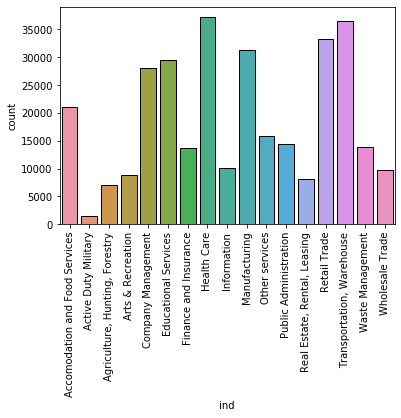

In [154]:
ax = sns.countplot(data_copy['ind'], order=np.unique(data_copy['ind']))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [163]:
data_copy['race'].value_counts()

White                               202047
Asian/Pacific Islander               49044
Other                                41282
African American                     14287
Two or more races                    10666
American Indian or Alaska Native      2674
Name: race, dtype: int64